In [2]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib  inline
from IPython.display import display

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

x_train = x_train.astype('float32').reshape(x_train.shape+(1,))
x_test = x_test.astype('float32').reshape(x_test.shape+(1,))
# Data normalization (0-255 is encoded as 0-1 instead)
x_train /= 255.0
x_test /= 255.0

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))
y_test = keras.utils.to_categorical(y_test, len(np.unique(y_test)))
# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [4]:
model = keras.Sequential()

# We are using greyscale images so the last input is 1 as in 1 color intensity
# If we were to use a full color pic then that number would be 3 for red,green,blue
# input layer
model.add(keras.layers.Conv2D(64, kernel_size=(8,8),
                             activation='relu',
                             input_shape=[x_train.shape[1],
                                          x_train.shape[2],
                                          x_train.shape[3]]))
model.add(keras.layers.Conv2D(128,(8,8), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer= keras.optimizers.Adam(),
             metrics= ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 21, 64)        4160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       524416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [5]:
# this is a large CNN and will take several minutes to train
batch_size = 512
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 540s 11ms/step - loss: 0.4069 - acc: 0.8715 - val_loss: 0.0791 - val_acc: 0.9763
Epoch 2/5
48000/48000 [==============================] - 475s 10ms/step - loss: 0.1056 - acc: 0.9687 - val_loss: 0.0545 - val_acc: 0.9833
Epoch 3/5
48000/48000 [==============================] - 458s 10ms/step - loss: 0.0725 - acc: 0.9791 - val_loss: 0.0431 - val_acc: 0.9878
Epoch 4/5
48000/48000 [==============================] - 468s 10ms/step - loss: 0.0570 - acc: 0.9827 - val_loss: 0.0391 - val_acc: 0.9884
Epoch 5/5
48000/48000 [==============================] - 474s 10ms/step - loss: 0.0484 - acc: 0.9851 - val_loss: 0.0372 - val_acc: 0.9896


In [6]:
# Final Result - Generalization!
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 38s 4ms/step
Test loss: 0.02599962749532133
Test accuracy: 0.9921


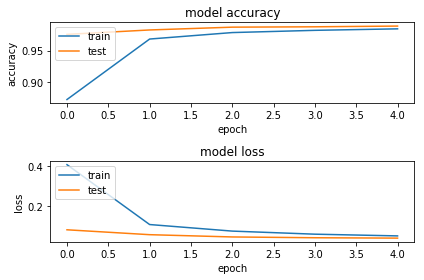

In [7]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

## Examining the weights for info

In [8]:
# This is everything!
weights = model.get_weights()

In [9]:
# How many tensors?
len(weights)

8

In [10]:
# What's the shape of the tensor
# for the connection weights at
# the -first- Conv2D layer?
weights[0].shape

(8, 8, 1, 64)

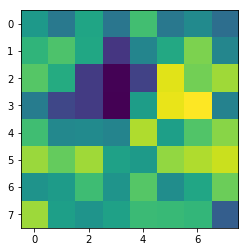

In [11]:
# We can plot the kernel weight matrix
# for just the first unit (out of 64)
# as an example...
plt.imshow(weights[0][:,:,0,0])
plt.show()

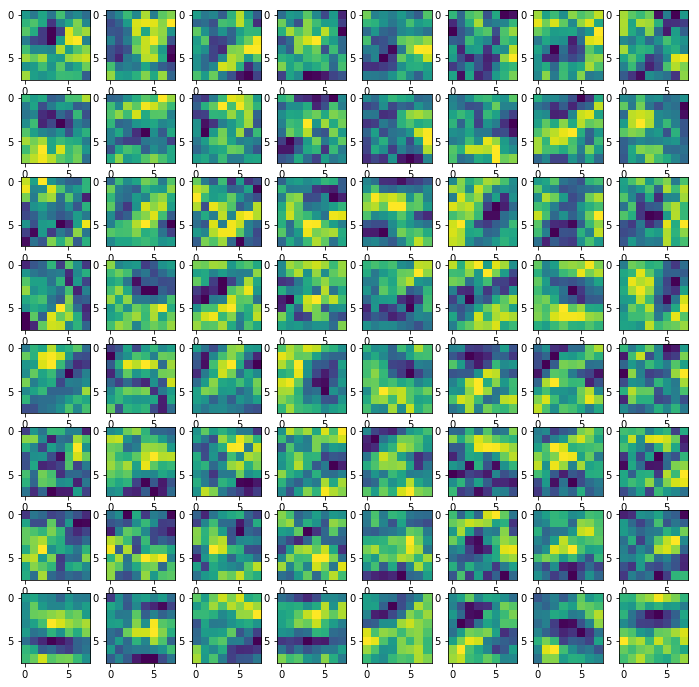

In [13]:
fig,axes = plt.subplots(8,8)
fig.set_figwidth(12)
fig.set_figheight(12)
for x in range(8):
    for y in range(8):
        data = weights[0][:,:,:,(x*8)+y].reshape(8,8)
        axes[x,y].imshow(data)
plt.show()

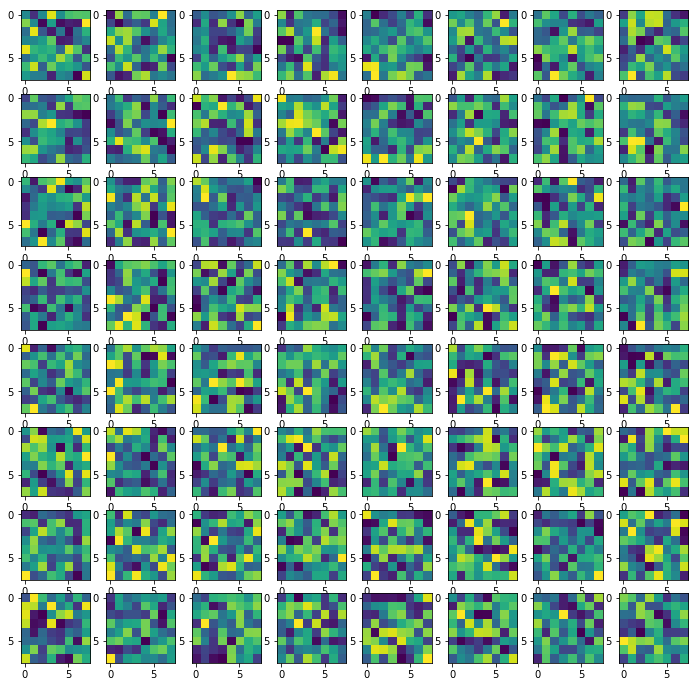

In [15]:
fig,axes = plt.subplots(8,8)
fig.set_figwidth(12)
fig.set_figheight(12)
for x in range(8):
    for y in range(8):
        axes[x,y].imshow(weights[2][:,:,(x*8)+y,0].reshape(8,8))
plt.show()

In [17]:
# Extract the input layer/tensor of the model
inp = model.input
# Extract the output layer/tensors of the model
# Note: there is one output tensor for each layer
# which contains the activation values
# for the layer in question...
outputs = [layer.output for layer in model.layers]
# Create a function to obtain the outputs given
# an input tensor...
functor = K.function([inp,K.learning_phase()], outputs)

In [18]:
# Get the layer outputs for the -first- image...
layer_outputs = functor([x_train[0:1,:,:,:],1.])
len(layer_outputs)

8

In [19]:
layer_outputs[0].shape

(1, 21, 21, 64)

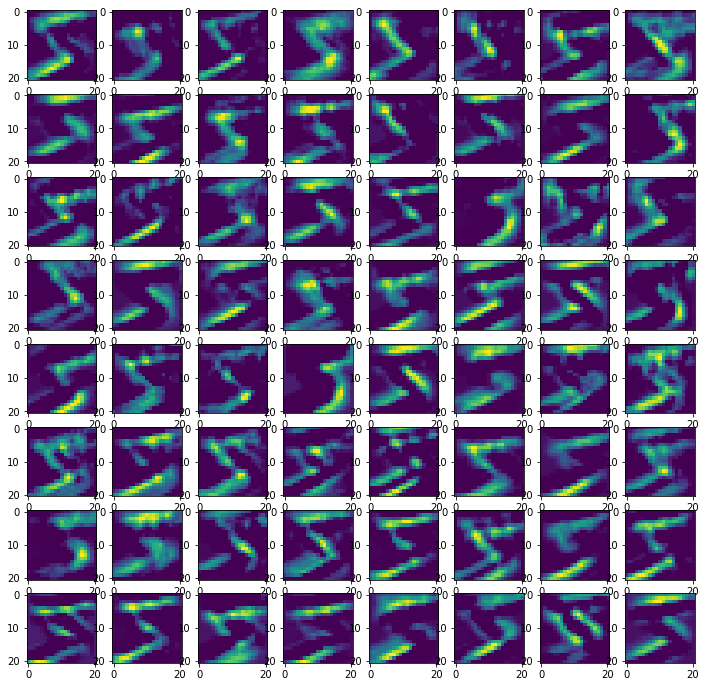

In [20]:
fig,axes = plt.subplots(8,8)
fig.set_figwidth(12)
fig.set_figheight(12)
for x in range(8):
    for y in range(8):
        axes[x,y].imshow(layer_outputs[0][0,:,:,(x*8)+y])
plt.show()

In [21]:
layer_outputs[1].shape

(1, 14, 14, 128)

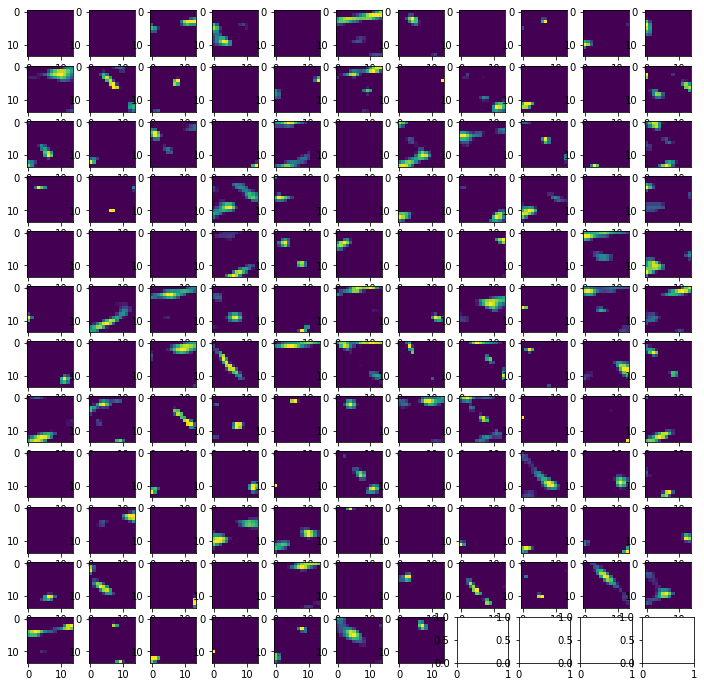

In [22]:
fig,axes = plt.subplots(12,11)
fig.set_figwidth(12)
fig.set_figheight(12)
for x in range(128):
    axes[int(x/11),int(x%11)].imshow(layer_outputs[1][0,:,:,x])
plt.show()

In [23]:
# How many of the training images to use?
n_train = 1000
# Extract the outputs for -all- requested patterns
layer_outputs = [functor([test[np.newaxis,...],1.]) for test in x_train[0:n_train,:,:,:]]
# Extract just the activations of the -sixth- layer in the network.
# Remember, this is a -dense- layer with 128 neural units.
# We can think of this as a 128-dimensional space in which each
# of the patterns has now been embedded by the neural network...
A = np.vstack([out[5].flatten() for out in layer_outputs])
A.shape

(1000, 128)

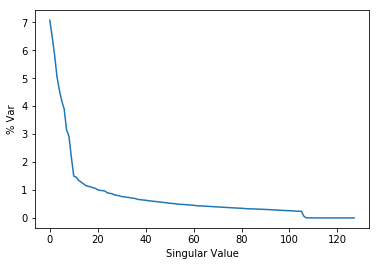

In [25]:
# Mean center a vector
def mean_center(x):
    return x - np.mean(x)
# Call this function for each column in the data (move along axis 0 or the rows)
Acentered = np.apply_along_axis(mean_center,0,A)
U,S,V = np.linalg.svd(Acentered,full_matrices=True)
# Percent variance accounted for
plt.plot(100.0*S/np.sum(S))
plt.ylabel('% Var')
plt.xlabel('Singular Value')
plt.show()

In [27]:
100.0*np.sum(S[0:3])/np.sum(S)

19.393806593032746

In [28]:
D = np.zeros([A.shape[0],A.shape[1]])
np.fill_diagonal(D,S)
Arotated = np.dot(U,D)
# First three principal components!
PCs = Arotated[:,0:3]
PCs.shape

(1000, 3)

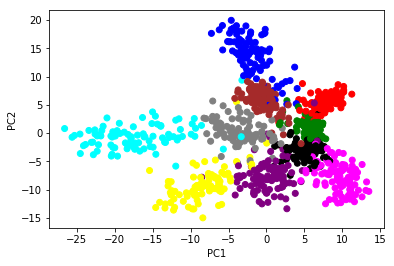

In [33]:
# Need a lot of colors again (10 - one for each class)
# PCs 1 and 2
plt.scatter(PCs[:,0],PCs[:,1],
            color=[['red','green','blue','cyan','magenta','yellow','black','brown','grey','purple'][i] for i in np.apply_along_axis(np.argmax,1,y_train[0:n_train,:])])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

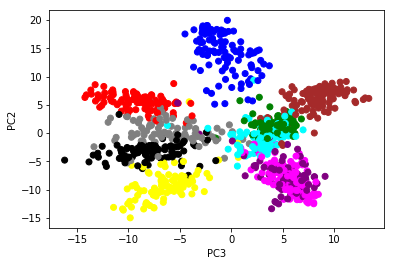

In [34]:
# PCs 2 and 3
plt.scatter(PCs[:,2],PCs[:,1],
            color=[['red','green','blue','cyan','magenta','yellow','black','brown','grey','purple'][i] for i in np.apply_along_axis(np.argmax,1,y_train[0:n_train,:])])
plt.xlabel("PC3")
plt.ylabel("PC2")
plt.show()


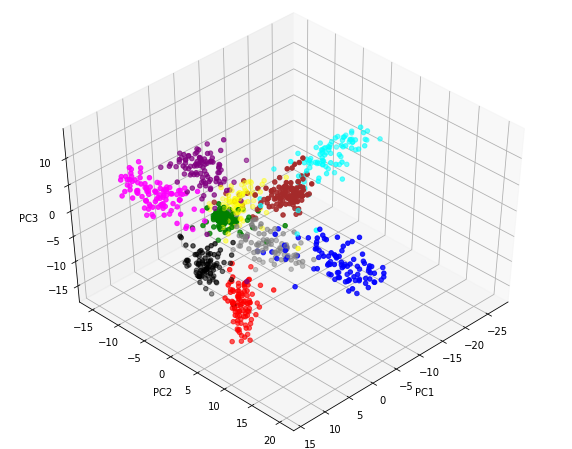

In [37]:
# 3D Plot fig = plt.f
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_figwidth(10)
fig.set_figheight(8)
ax.scatter(PCs[:,0],PCs[:,1],PCs[:,2],
           color=[['red','green','blue','cyan','magenta','yellow','black','brown', 'grey', 'purple'][i] for i in np.apply_along_axis(np.argmax,1,y_train[0:n_train,:])])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(45,45)

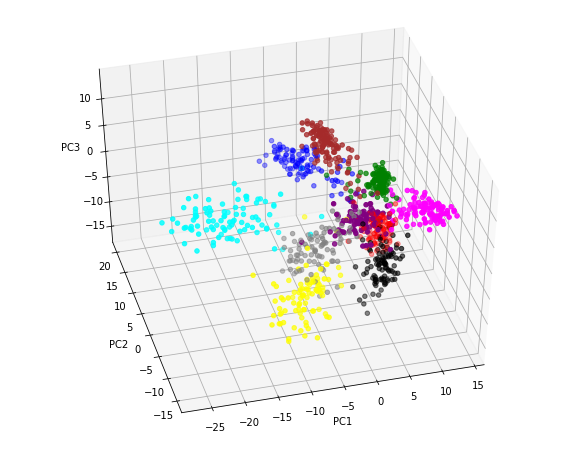

In [38]:
# 3D Plot fig = plt.f
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_figwidth(10)
fig.set_figheight(8)
ax.scatter(PCs[:,0],PCs[:,1],PCs[:,2],
           color=[['red','green','blue','cyan','magenta','yellow','black','brown', 'grey', 'purple'][i] for i in np.apply_along_axis(np.argmax,1,y_train[0:n_train,:])])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(45,255)

## Using googles Xception image classifier to pretrain a Net

In [39]:
# First a few tools for this -particular- example...
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [40]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
X = np.concatenate([grab_image('/nfshome/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])
X.shape

(100, 299, 299, 3)

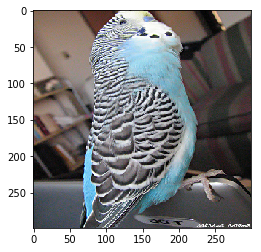

In [41]:
#if we want to take preprocessed images and reconvert them to view (just to ook at them)
plt.imshow(image.array_to_img(X[0,:,:,:]))
plt.show()

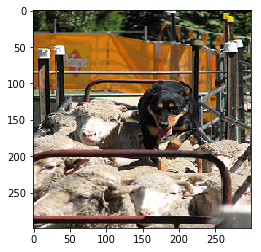

In [42]:
plt.imshow(image.array_to_img(X[1,:,:,:]))
plt.show()

In [43]:
# Let's load up the model
# This will load up the architecture
# and then the pre-trained weights from the
# internet...
model = Xception(weights='imagenet')
model.summary()

91889664/91884032 [==============================] - 45s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________

In [44]:
# Check the first image in out data againts the un modified Xception Net
# Just the first image that we say above...
preds = model.predict(X[0:1,:,:,:])
# Decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01817953', 'African_grey', 0.44841644), ('n01608432', 'kite', 0.037295196), ('n01819313', 'sulphur-crested_cockatoo', 0.016664091), ('n01798484', 'prairie_chicken', 0.010966327), ('n01807496', 'partridge', 0.010686256)]


In [45]:
# 37 cats in there (label 1, and all else 0)
Y = np.loadtxt('/nfshome/sandbox/xception_example/class_labels.csv')
Y = keras.utils.to_categorical(Y)
# Take a look at the first 10...
Y[0:10,:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## We can see a 0,1 at index 4, so this is a cat in our multidimensional (2d) 1 -> [0,1] class vector 

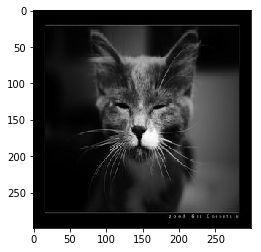

In [46]:
plt.imshow(image.array_to_img(X[4,:,:,:]))
plt.show()

In [51]:
# Build an Xception-based network
# Base Model
base_model = keras.applications.Xception(weights='imagenet',include_top=False)
# This model uses the trained weights, but critically,
# the include_top=False flag is provided to allow us to
# add our own layers at the top...
# New model that we are adding at the end...
# We will start by setting the -start- of the model
# to the -end- (output) of the pretrained model...
new_model = base_model.output
# Now, we can start adding our own layers to the model...
# Here, I am using the -functional- network model for
# Keras instead of the -sequential- model. This means we
# need to "manually" tie our layers together by creating
# them and then providing the upstream layer as an argument
# to the object's functional interface:
new_model = keras.layers.GlobalAveragePooling2D()(new_model)
# We are using an average pooling layer to select the most
# likely among the features provided by the base_network...
# Now, let's continue to stack layers into the model...
new_model = keras.layers.Dense(30,activation='relu')(new_model)
# Add the final output layer (just 2 classes)
new_model = keras.layers.Dense(2,activation='softmax')(new_model)
# For the functional model, we first build up a set of layers
# and network componenets, and then specify which of those
# layers and components function as the input and output for
# our model.
model = keras.Model(inputs=base_model.input,outputs=new_model)
# It's possible to have -multiple- input or output components
# for a model as well, but here we just use the Xception model's
# input layer and the output layer from our added layers as
# the output layer for the mode...
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])
# Take a quick look at it...
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [52]:
batch_size = 20
epochs = 10
history = model.fit(X, Y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.4)
# 0.4 split size provides 25 cats in the training set,
# and 12 in the validation set...

Train on 60 samples, validate on 40 samples
Epoch 1/10
60/60 [==============================] - 351s 6s/step - loss: 0.6364 - acc: 0.7833 - val_loss: 0.4416 - val_acc: 0.8250
Epoch 2/10
60/60 [==============================] - 270s 4s/step - loss: 0.3327 - acc: 0.9667 - val_loss: 0.4303 - val_acc: 0.8000
Epoch 3/10
60/60 [==============================] - 272s 5s/step - loss: 0.0898 - acc: 0.9833 - val_loss: 0.6807 - val_acc: 0.7750
Epoch 4/10
60/60 [==============================] - 322s 5s/step - loss: 0.0207 - acc: 1.0000 - val_loss: 0.8979 - val_acc: 0.7750
Epoch 5/10
60/60 [==============================] - 190s 3s/step - loss: 0.0145 - acc: 1.0000 - val_loss: 1.0713 - val_acc: 0.7750
Epoch 6/10
60/60 [==============================] - 168s 3s/step - loss: 0.0850 - acc: 0.9667 - val_loss: 1.6614 - val_acc: 0.7000
Epoch 7/10
60/60 [==============================] - 177s 3s/step - loss: 0.1569 - acc: 0.9667 - val_loss: 2.0964 - val_acc: 0.7000
Epoch 8/10
60/60 [=====================

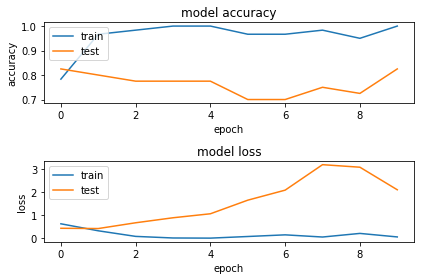

In [53]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

## CNN scratch

In [54]:
# A convolution net for the cat problem!
model = keras.Sequential()
# Three input channels this time!
model.add(keras.layers.Conv2D(64, kernel_size=(8, 8),
activation='relu',
input_shape=[X.shape[1],
X.shape[2],
X.shape[3]]))
model.add(keras.layers.Conv2D(128, (8, 8), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(8, 8)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
# Roughly the same number of parameters!
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 292, 292, 64)      12352     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 285, 285, 128)     524416    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               20070528  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [55]:
# Train
history = model.fit(X, Y,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_split=0.4)

Train on 60 samples, validate on 40 samples
Epoch 1/5
60/60 [==============================] - 245s 4s/step - loss: 4.5311 - acc: 0.5500 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 2/5
60/60 [==============================] - 270s 4s/step - loss: 6.7159 - acc: 0.5833 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 3/5
60/60 [==============================] - 257s 4s/step - loss: 6.7159 - acc: 0.5833 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 4/5
60/60 [==============================] - 289s 5s/step - loss: 6.7159 - acc: 0.5833 - val_loss: 4.8354 - val_acc: 0.7000
Epoch 5/5
60/60 [==============================] - 226s 4s/step - loss: 6.7159 - acc: 0.5833 - val_loss: 4.8354 - val_acc: 0.7000


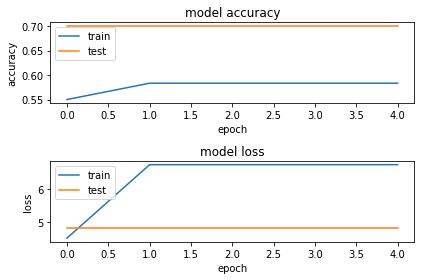

In [56]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
## not 